# SIMULACIÓN | PROYECTO UNIDAD 1




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: viernes 4 de octubre 23:59 horas.  


- Este trabajo pondera un 25% del total del curso 

**Integrantes:** 

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize

In [3]:
import random

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (1 punto) Analice la simulación, realice las siguientes modificaciones en el proceso e interprete sus resultados:

    (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?
    
    (b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 
    
    (c) Comente la simulación propuesta ¿Qué otros factores inciden en los resultados de la simulación?
    
    
2. (1 punto) Defina eventos de interés $A$, $B$ y $C$ y calcule las siguientes probabilidades mediante la simulación propuesta:

    (a) $P(A), P(B) y P(C)$ 
    
    (b) $P(A \cup B) $ 

    (c) $P(A \mid C)$
    
Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$


#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [4]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0,pozo)
    return parte1, pozo - parte1

def transaccion_triangular(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.triangular(0,pozo)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [5]:
def simula_TGR(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion_triangular(dinerop[i], dinerop[j]) 
        yield dinerop

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [31]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula([120] * 4, 8):
    print(pop)

[120, 120, 120, 120]
[38.685878218967844, 201.31412178103216, 120, 120]
[184.39755747870964, 55.60244252129036, 120, 120]
[103.62989229365539, 136.3701077063446, 120, 120]
[46.20968463568935, 136.3701077063446, 120, 177.42020765796605]
[110.35982520849986, 136.3701077063446, 55.849859427189486, 177.42020765796605]
[110.35982520849986, 311.84962254314536, 55.849859427189486, 1.940692821165328]
[110.35982520849986, 246.56153046521297, 55.849859427189486, 67.22878489909772]
[23.079053255371125, 333.84230241834166, 55.849859427189486, 67.22878489909772]


*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [6]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show1(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()

def show2(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula_TGR(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()  


## Simulación con variación de Sueldo Medio

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  20.2   52   74  100  127  146
 20,000 0.50  98.2    1   11   71  232  442
 40,000 0.50  97.9    1   11   69  231  462
 60,000 0.50 101.6    1   11   68  234  482
 80,000 0.50  99.5    1   10   69  230  456
100,000 0.50  99.6    1   11   69  230  451
120,000 0.49  98.2    1   11   72  228  449
140,000 0.51 102.6    1   10   69  230  470
160,000 0.50  99.0    1   10   71  230  449
180,000 0.50  99.2    1   10   69  229  454
200,000 0.50  99.9    1   10   69  226  464


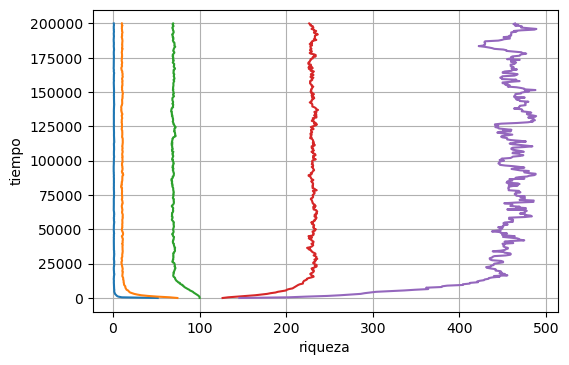

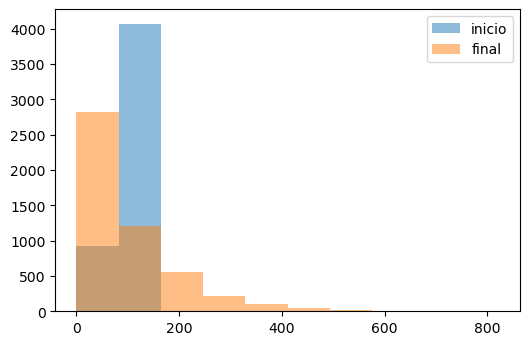

In [50]:
N  = 5000 # Tamaño de la población
MU = 100 # Dinero medio en la población

#dinerop = [random.uniform(MU,MU/7) for actor in range(N)]
dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show1(dinerop)

### Parte I : Pregunta 1.a
    '[um] = Unidad monetaria.
    
    'Cuando el dinero medio de la poblacion baja de los 55-60[um], primer percentil que corresponde al 1% de la población, no obtiene riquesas en ciertas cantidad de transacciónes.
    
    'Cuando se mantiene en un nivel de 100-130[um], el primer,segundo y tercer percentil tienden a quedarse bajo la media, existiendo diferencias acumuladas de 300 unidades monetarias a partir del tercer percentil. Por otro lado el primer percentil logra aumentar su nivel de riquesa después de las 20000 transacciones a partir de las 115unidades monetarias.
    
    'Cuando se mantiene un nivel sobre las 400[um], el nivel de riquesa se dispersa un poco más.
    
    En conclusión con respecto al coeficiente de Gini, éste se mantine parcial ya que el comportamiento de su distribucion en la generacion de riquesa depende del valor proporcionado por la riquesa media, y que esta se estabiliza al término intermedio hacia una convergencia donde no se puede decidir la existencia de desigualdad o igualdad de riquesa.

### Parte I : Pregunta 1.b

    Modificación de función transacción, cual se cambia generación de valores aleatorios

### Simulación de datos con distribución de aleatoriedad  triangular

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.8   55   75  100  126  146
 20,000 0.34  63.4   10   31   87  185  307
 40,000 0.34  63.9    9   32   87  186  308
 60,000 0.34  62.5   10   32   87  181  297
 80,000 0.33  62.3   11   33   87  183  307
100,000 0.34  64.2   10   31   86  185  305
120,000 0.34  62.9   10   32   88  184  302
140,000 0.34  64.4    9   31   88  183  309
160,000 0.33  61.1   11   33   89  182  290
180,000 0.34  62.5   11   32   87  184  293
200,000 0.34  62.9   10   31   87  183  302


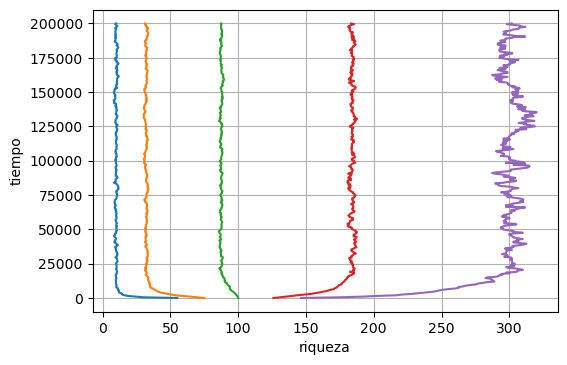

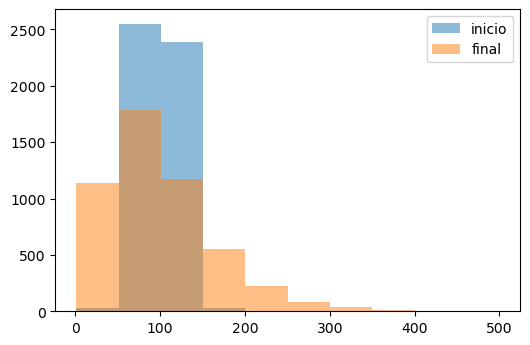

In [49]:
N  = 5000 # Tamaño de la población
MU = 100 # Dinero medio en la población

#dinerop = [random.uniform(MU,MU/7) for actor in range(N)]
dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show2(dinerop)

### Parte I : Pregunta 1.c

    Discusión de resultados, donde otros factores influyen en la entrega de resultados

    Se puede desprender además que en la variación del SIGMA para generación de riquesa poblacional, el coeficiente de GINI inicialmente nos entrega una igualdad efectiva, ya que la generacion aleatoria de riquesa poblacional está dada por una distribución normal y cuanto más chico es el valor de concentración de la distribucion, esta se acota, por lo que los percentiles se juntan en función de la media salarial, para luego estabilizarse a la media cuando sobrepasa las 20000 transancciones.
    
    Por otro lado cuando se cambia la función de transacción, el coeficiente de GINI puede disminuir, ya que la funcion de distribucion a generar las transacciones, posee una concentración de valores distinta a la uniforme, permitiendo ser más equitativo en la repartición de dinero recaudado por un par de actores. 
    
    En relación a los datos podemos desprender que se acota la brecha de desigualdad, donde los percentiles más altos de la población disminuyen sus cifras, se acercándose a los primeros 3, los cuales aumentan.
    
    En relación a las series de tiempo, existe una similitud en tendecia reflejada en el comportamiento de un valor esperado, y que los percentiles intermedios están más cercanos junto con los extremos que estan más cerrados, hacia la tendencia central salarial.
    
    Con respecto al gráfico de desigualdad, al mostar en los datos con una convergencia no resolutiva en la primera simulación, podemos desprender que existe una disparidad además de una gran diferencia en comportamiento de los datos simulados. En comparación a la segunda simulación, logramos obtener un comportamiento casi homogeneo, donde éstos logran estar dentro de una distribución conocida con media asociada.
    

### Parte I : Pregunta 2

(array([2.7027e+04, 3.5737e+04, 1.7654e+04, 6.5860e+03, 2.0530e+03,
        6.8100e+02, 1.9200e+02, 4.4000e+01, 2.0000e+01, 6.0000e+00]),
 array([3.91354541e+02, 2.11469731e+05, 4.22548107e+05, 6.33626483e+05,
        8.44704859e+05, 1.05578324e+06, 1.26686161e+06, 1.47793999e+06,
        1.68901836e+06, 1.90009674e+06, 2.11117512e+06]),
 <BarContainer object of 10 artists>)

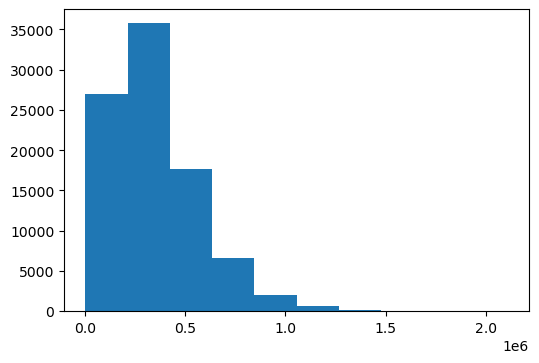

In [44]:
#Ejemplo simple de simular una población de 90000 actores, 
#con $350000 cada uno inicialmente y 6*150000 iteraciones:

data=[]
for pop in simula_TGR([350000] * 90000, 6*150000):
    data=pop
plt.hist(data)

##### P(A) = Actores con riqueza menor a 70000

In [69]:
p_a = 0
din_p_a=[]
for i in data:
    if i<70000:
        p_a+=1
        din_p_a.append(i)
print(f"P(A) = ",p_a/len(data))

P(A) =  0.04055555555555555


##### P(B) = Coeficiente de gini de la población sea mayor a 0.03 con 5000 transacciones.

(array([464., 501., 482., 465., 506., 489., 529., 501., 517., 547.]),
 array([0.        , 0.00341199, 0.00682397, 0.01023596, 0.01364795,
        0.01705993, 0.02047192, 0.02388391, 0.02729589, 0.03070788,
        0.03411986]),
 <BarContainer object of 10 artists>)

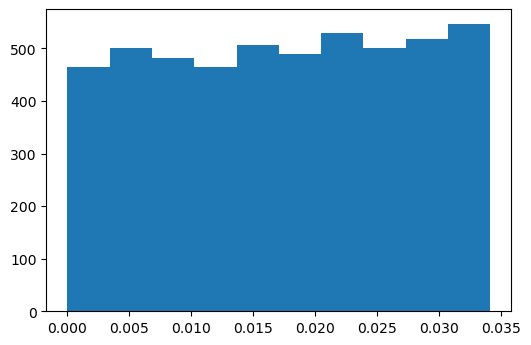

In [52]:
dat=[]
for pop in simula_TGR([350000] * 90000, 5000):
    dat.append(gini(pop))
plt.hist(dat)

In [63]:
el=0
for i in dat:
    if i>= 0.03:
        el+=1
print(f'P(B) = ',el/5000)

P(B) =  0.131


##### P(C) = Actores que se encuentren en el 2° percentil

In [70]:
se_percentil= len(data)*(2/5)

print(f"P(C) = ",se_percentil/len(data))

P(C) =  0.4


##### $P(A \cup B)$ = Actores con riqueza menor a 70000 o dentro del coeficiente de gini de 0.03 con 5000 transacciones

In [72]:
Pa_b = (el/5000)+(se_percentil/len(data))
print(f"P(A∪B) =",Pa_b)

P(A∪B) = 0.531


##### $P(A | C)$ =  Actores que se encuentren en el 2° percentil dado que su riqueza sea menor a 70000

$P(A | C) = P(A \cap B )/P(B) = P(A) $ Para sucesos A y B independientes.

In [68]:
print(f"P(A|B) = ", p_a/len(data))

P(A|B) =  0.04055555555555555


## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos (al menos 1000 datos) de una variable aleatoria a valores reales. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio de datos climáticos: www.cr2.cl

0. Indique la fuente de sus datos. 


1. (0,5 pts) Descripcion de datos:  describa sus datos estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

2. (1 punto) Seleccione aleatoriamente una cantidad N de sus datos y calcule 3 estadísticos muestrales, luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

3. (1 punto) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

4. (0,5 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

5. (1 punto) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 


### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 
